1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b

51
100
105
256


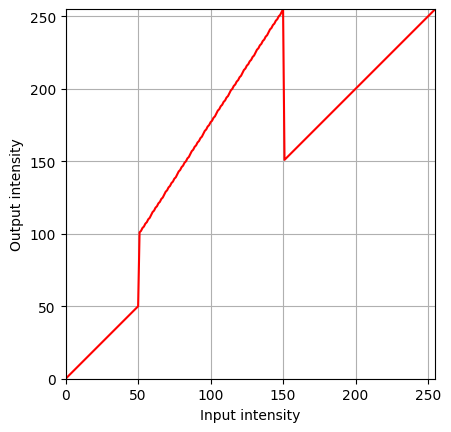

([], [])

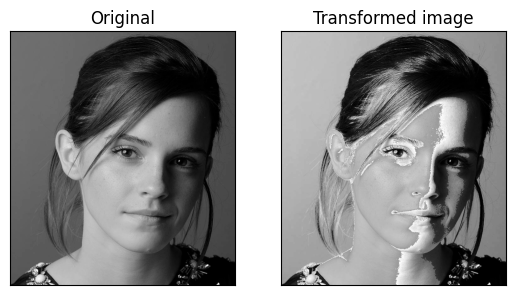

In [1]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#built the transformation
c = np.array([(50, 50), (50, 100),(150, 255),(150, 150),(255,255)])
#for first 50 value set
t1 = np.linspace(0, c[0, 1], c[0, 0] + 1 - 0).astype('uint8')
print(len(t1))
#for second value set
t2 = np.linspace(c[1, 1] + 1, c[2, 1], c[2, 0] - c[1, 0]).astype('uint8')
print(len(t2))
#for third value set 
t3 = np.linspace(c[3, 1] + 1, c[4,1], c[4,0] - c[3, 0]).astype('uint8')
print(len(t3))
#first two concatenation
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
#all concatenation
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.savefig('transform.png')
plt.grid(True)
plt.show()

#reading the image
img_orig = cv.imread(r"zooming\emma.jpg", cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)

#applying the transformation
image_transformed = cv.LUT(img_orig, transform)

#plotting the images
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all')
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformed, cmap='gray',vmin=0, vmax=255)
axes[1].set_title('Transformed image')
axes[1].set_xticks([]), axes[1].set_yticks([])


2. Apply a similar operation as above (question 1) to accentuate
(a) white matter
(b) gray matter
in the brain proton density image shown in Fig. 2. Show the intensity transformations as a plots

206
50
256
76
105
75
256


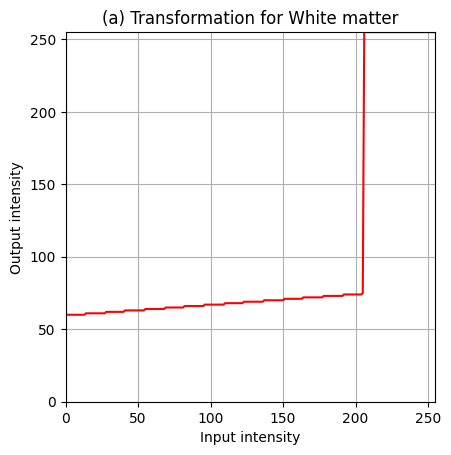

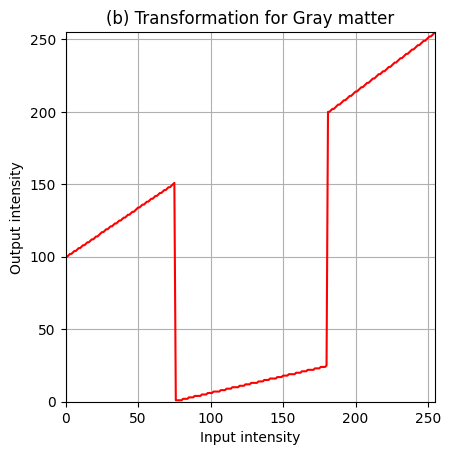

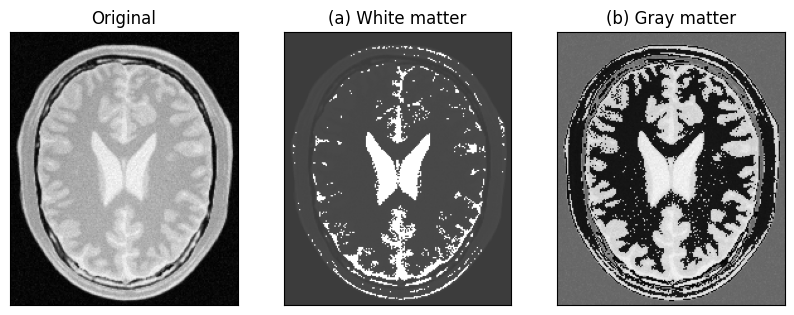

In [136]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

c = np.array([(0,60),(205, 75), (205, 254)])
t1 = np.linspace(c[0,1], c[1, 1], c[1, 0] + 1 - 0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[2, 1] + 1, 255, 255 - c[2, 0] ).astype('uint8')
print(len(t2))
transform1 = np.concatenate((t1, t2), axis=0).astype('uint8')
print(len(transform1))

c = np.array([(0, 100), (75, 150), (75,0),(180, 25),(180, 200)])
t3 = np.linspace(c[0,1], c[1, 1] + 1, c[1,0] - c[0,0]+1).astype('uint8')
print(len(t3))
t4 = np.linspace(c[2, 1] + 1, c[3,1], c[3,0] - c[2, 0]).astype('uint8')
print(len(t4))
t5 = np.linspace(c[4, 1], 255, 255 - c[4,0]).astype('uint8')
print(len(t5))
transform2 = np.concatenate((t3, t4), axis=0).astype('uint8')
transform2 = np.concatenate((transform2, t5), axis=0).astype('uint8')
print(len(transform2))

fig, ax = plt.subplots()
ax.plot(transform1, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.title("(a) Transformation for White matter")
plt.grid(True)
plt.show()


fig, ax = plt.subplots()
ax.plot(transform2, color='red')
ax.set_xlabel(r'Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_ylim(0, 255)
ax.set_aspect('equal')
plt.title("(b) Transformation for Gray matter")
plt.grid(True)
plt.show()

img_orig = cv.imread(r"zooming\BrainProtonDensitySlice9.png", cv.IMREAD_GRAYSCALE)

image_transformeda = cv.LUT(img_orig, transform1)
image_transformedb = cv.LUT(img_orig, transform2)

fig, axes = plt.subplots(1, 3,figsize=(10,10), sharex='all', sharey='all')
axes[0].imshow(img_orig, cmap='gray')
axes[0].set_title('Original')
axes[0].set_xticks([]), axes[0].set_yticks([])

axes[1].imshow(image_transformeda, cmap='gray',vmin=0, vmax=255)
axes[1].set_title('(a) White matter')
axes[1].set_xticks([]), axes[1].set_yticks([])

axes[2].imshow(image_transformedb, cmap='gray',vmin=0, vmax=255)
axes[2].set_title('(b) Gray matter')
axes[2].set_xticks([]), axes[2].set_yticks([])
plt.show()


3. Consider the image shown in Fig. 3
1
. [10]
(a) Apply gamma correction to the L plane in the L
∗a
∗b
∗
color space and state the γ value.
(b) Show the histograms of the original and corrected images.

Gamma : 0.879278937785045


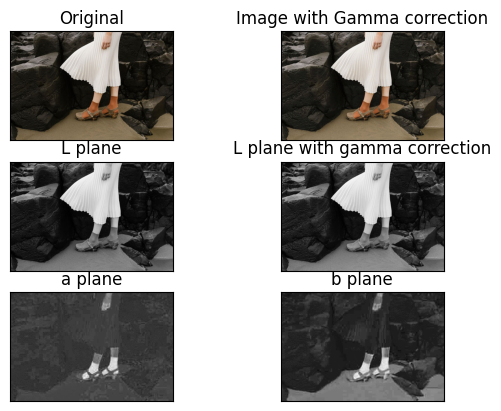

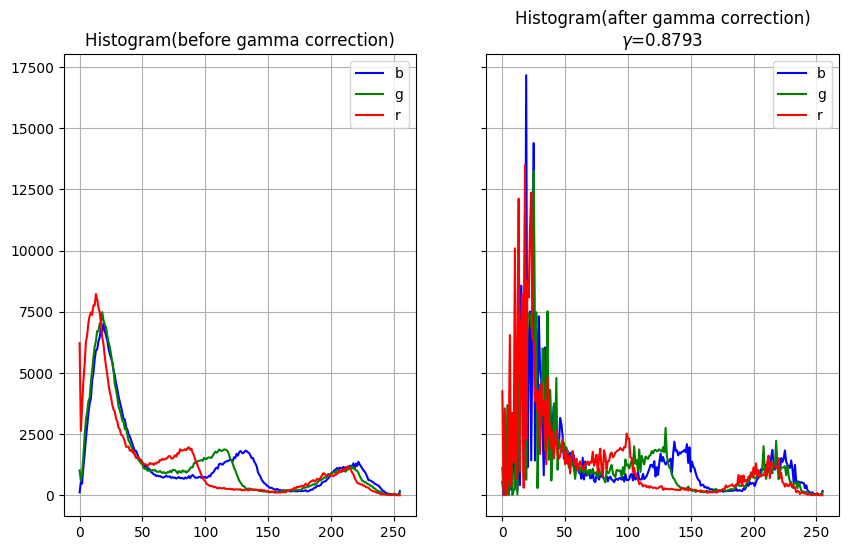

In [11]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img_orig = cv.imread(r"zooming\highlights_and_shadows.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2Lab)
img_L_orig, img_a, img_b = cv.split(img_orig)

mean = np.mean(img_L_orig)
gamma = math.log(mean)/math.log(128)
print('Gamma :',gamma)

table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8')
img_L_gamma = cv.LUT(img_L_orig, table)

img_gamma = cv.merge([img_L_gamma, img_a, img_b])
img_cvt_gamma = cv.cvtColor(img_gamma, cv.COLOR_Lab2RGB) 

fig, axes = plt.subplots(3, 2)
axes[0,0].imshow(img_orig1, cmap='gray')
axes[0,0].set_title('Original')
axes[0,0].set_xticks([]), axes[0,0].set_yticks([])

axes[0,1].imshow(img_cvt_gamma, cmap='gray',vmin=0, vmax=255)
axes[0,1].set_title('Image with Gamma correction')
axes[0,1].set_xticks([]), axes[0,1].set_yticks([])

axes[1,0].imshow(img_L_orig, cmap='gray')
axes[1,0].set_title('L plane')
axes[1,0].set_xticks([]), axes[1,0].set_yticks([])

axes[1,1].imshow(img_L_gamma, cmap='gray',vmin=0, vmax=255)
axes[1,1].set_title('L plane with gamma correction')
axes[1,1].set_xticks([]), axes[1,1].set_yticks([])

axes[2,0].imshow(img_a, cmap='gray')
axes[2,0].set_title('a plane')
axes[2,0].set_xticks([]), axes[2,0].set_yticks([])

axes[2,1].imshow(img_b, cmap='gray')
axes[2,1].set_title('b plane')
axes[2,1].set_xticks([]), axes[2,1].set_yticks([])

fig1, ax1 =  plt.subplots(1,2,figsize=(10, 6), sharey=all, sharex = all)

color = ('b', 'g', 'r')
for i, c in enumerate(color):
    hist_orig = cv.calcHist([img_orig1], [i], None, [256], [0, 256])
    ax1[0].plot(hist_orig, color=c)
    hist_gamma = cv.calcHist([img_cvt_gamma], [i], None, [256], [0, 256])
    ax1[1].plot(hist_gamma, color=c)

ax1[0].legend(color,loc = 'best')
ax1[1].legend(color,loc = 'best')
ax1[0].set_title('Histogram(before gamma correction)')
ax1[1].set_title('Histogram(after gamma correction)\n'+r'$\gamma$='+str(round(gamma,4)))
ax1[0].grid(True)
ax1[1].grid(True)

# Display the plots
plt.show()


4. Increasing the vibrance of a photograph is probably achieved by applying an intensity transformation to the saturation plane,
(a) Split the image shown in Fig. 4 into hue, saturation, and value planes.
(b) Apply the aforementioned intensity transformation to the saturation plane.
(c) Adjust a to get a visually pleasing output. Report the value of a.
(d) Recombine the three planes.
(e) Display the original image, vibrance-enhanced image, and the intensity transformation.

(a)


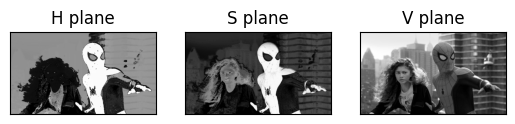

(b), (c), (d)


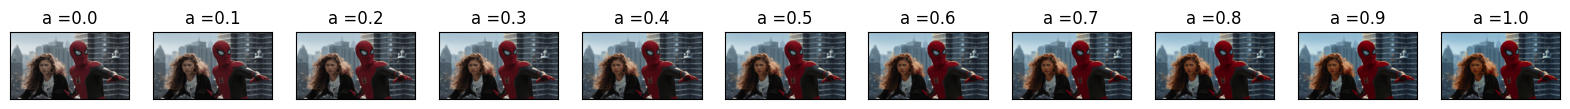

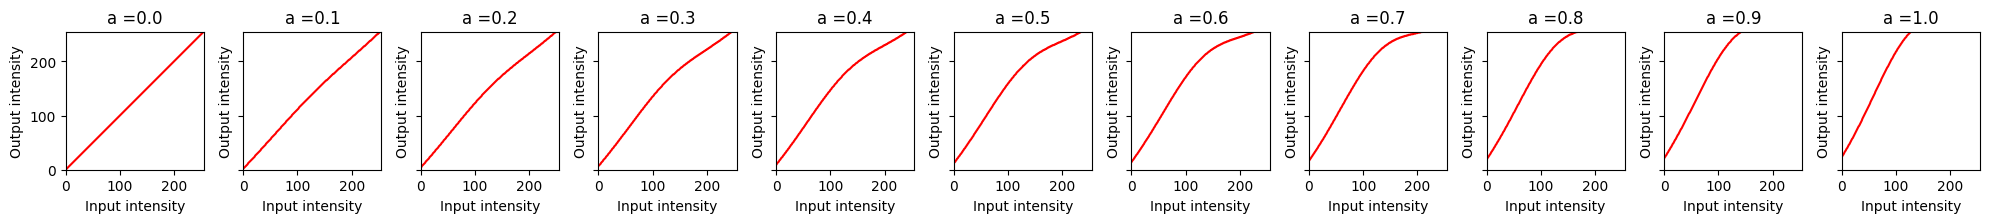

a = 0.5 is prefered
(d)


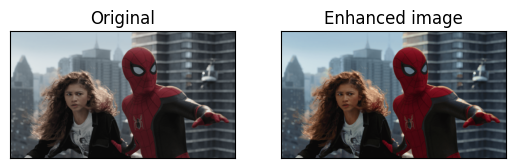

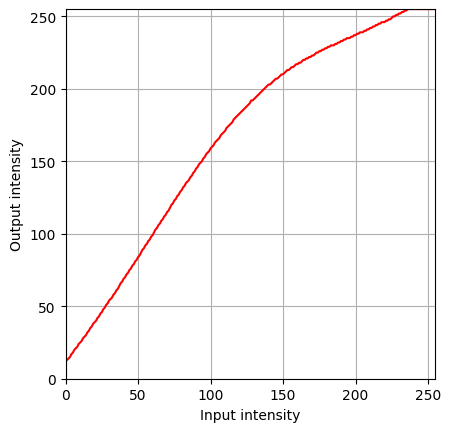

In [24]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


img_orig = cv.imread("zooming/spider.png",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

#display the h,s,v plane
print("(a)")
fig, ax = plt.subplots(1,3)
ax[0].imshow(img_H, cmap='gray')
ax[0].set_title('H plane')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(img_S, cmap='gray')
ax[1].set_title('S plane')
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(img_V, cmap='gray')
ax[2].set_title('V plane')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

sigma = 70
sequence = [i*.1 for i in range(0,11)]

fig, ax = plt.subplots(1,11, figsize=(20,220))
fig1, ax1 = plt.subplots(1,11,sharex='all',sharey='all',figsize=(20,220))

print("(b), (c), (d)")
for i, a in enumerate(sequence):

    transform = np.array([min((j+128*(a*math.exp(-((j-128)**2)/(2*(sigma**2))))),255) for j in np.arange(0,256)]).astype(np.uint8)
    img_S_trans = cv.LUT(img_S, transform)
    img_trans = cv.merge([img_H, img_S_trans, img_V])
    img_trans1 = cv.cvtColor(img_trans, cv.COLOR_HSV2RGB) 

  
    ax1[i].plot(transform, color='red')
    ax1[i].set_xlabel(r'Input intensity')
    ax1[i].set_ylabel('Output intensity')
    ax1[i].set_xlim(0, 255)
    ax1[i].set_ylim(0, 255)
    ax1[i].set_aspect('equal')
    ax1[i].set_title('a ='+str(round(a,2)))

    ax[i].imshow(img_trans1, cmap='gray',vmin=0, vmax=255)
    ax[i].set_title('a ='+str(round(a,2)))
    ax[i].set_xticks([]), ax[i].set_yticks([])

plt.tight_layout()
plt.show()

print("a = 0.5 is prefered")
transform = np.array([min((j+128*(.5*math.exp(-((j-128)**2)/(2*(sigma**2))))),255) for j in np.arange(0,256)]).astype(np.uint8)
img_S_trans = cv.LUT(img_S, transform)
img_trans = cv.merge([img_H, img_S_trans, img_V])
img_trans1 = cv.cvtColor(img_trans, cv.COLOR_HSV2RGB) 

print("(d)")
fig, ax = plt.subplots(1,2)
ax[0].imshow(img_orig1, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(img_trans1, cmap='gray',vmin=0, vmax=255)
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].set_title('Enhanced image')

fig1, ax1 = plt.subplots()
ax1.plot(transform, color='red')
ax1.set_xlabel(r'Input intensity')
ax1.set_ylabel('Output intensity')
ax1.set_xlim(0, 255)
ax1.set_ylim(0, 255)
ax1.set_aspect('equal')
plt.grid(True)
plt.show()

5. Write a function of your own to carry out histogram equalization on the image shown in Fig. 5. Show the
histograms before and after equalization.

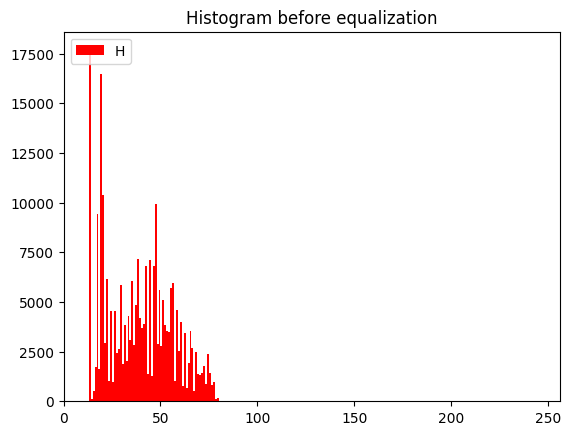

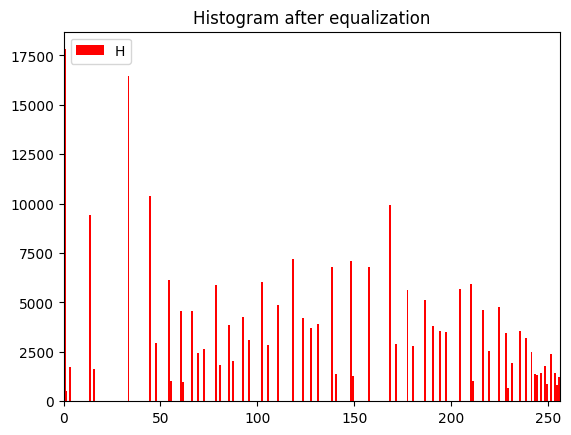

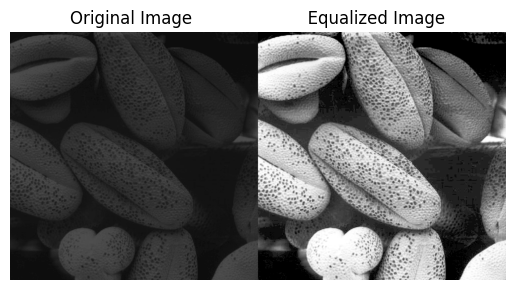

In [140]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#histogram equalizing function
def img_eq(img):

    if(len(img.shape) ==3 and img.shape[2] == 3 ):
         img_cvt = cv.cvtColor(img, cv.COLOR_BGR2RGB)
         r,g,b = cv.split(img_cvt)
         r_eq = cv.equalizeHist(r)
         g_eq = cv.equalizeHist(g)
         b_eq = cv.equalizeHist(b)
         return cv.merge([r_eq, g_eq, b_eq])
    
    return cv.equalizeHist(img_orig)

#function for drawing histogram
def hist(img):
    if(len(img.shape) ==2 or img.shape[2] != 3 ):
        hist, bins = np.histogram(img.ravel(), 256, [0,256])
        plt.hist(img.flatten(), 256, [0,256], color = 'r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram before equalization')
        plt.show()
        equ = img_eq(img)

        hist, bins = np.histogram(equ.ravel(), 256, [0, 256])
        plt.hist(equ.flatten(), 256,[0,256], color='r')
        plt.xlim([0,256])
        plt.legend('Histogram', loc = 'upper left')
        plt.title('Histogram after equalization')
        plt.show()

    else:
        color = ('r', 'g', 'b')
        for index, cl in enumerate(color):
            hist = cv.calcHist(img,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            
        plt.title('Histogram before equalization')
        plt.xlim([0, 256])
        plt.show()
        plt.legend(color, loc = 'upper left')

        equ = img_eq(img)

        for index, cl in enumerate(color):
            hist = cv.calcHist(equ,[index],None,[256],[0,256])
            plt.plot(hist, color=cl)
            #plt.hist(equ.flatten(), 256, [0,256], color = cl)
        plt.title('Histogram after equalization')
        plt.xlim([0, 256])
        plt.legend(color, loc = 'upper left')
        plt.show()

    res = np.hstack((img_orig, equ))
    fig, ax = plt.subplots()
    plt.axis('off')
    plt.imshow(res, cmap='gray',vmin=0, vmax=255)
    ax.set_title("Original Image                      Equalized Image")

    plt.show()

         
img_orig = cv.imread("zooming/shells.tif", cv.IMREAD_GRAYSCALE)
assert img_orig is not None
eq_img = hist(img_orig)


6. In this question, we will apply histogram equalization only to the foreground of an image to produce an
image with a histogram equalized foreground.
(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.
(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.
(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.
(d) Obtain the cumulative sum of the histogram using np.cumsum.
(e) Use the formulas in slides to histogram-equalize the foreground.
(f) Extract the background and add with the histogram equalized foreground.

(a)


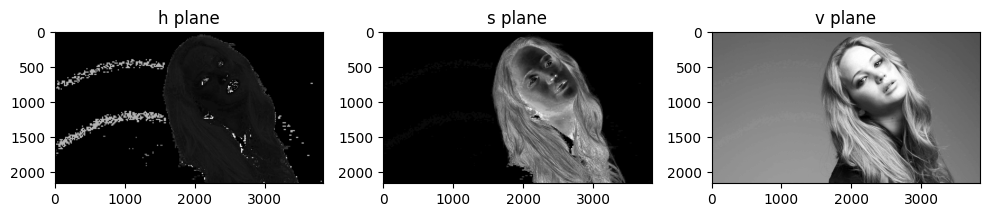

(b)


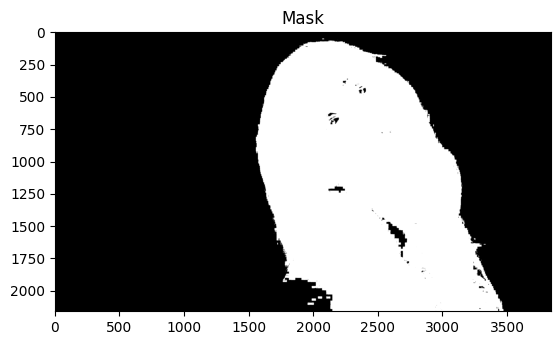

before equalization(foreground)
(d)


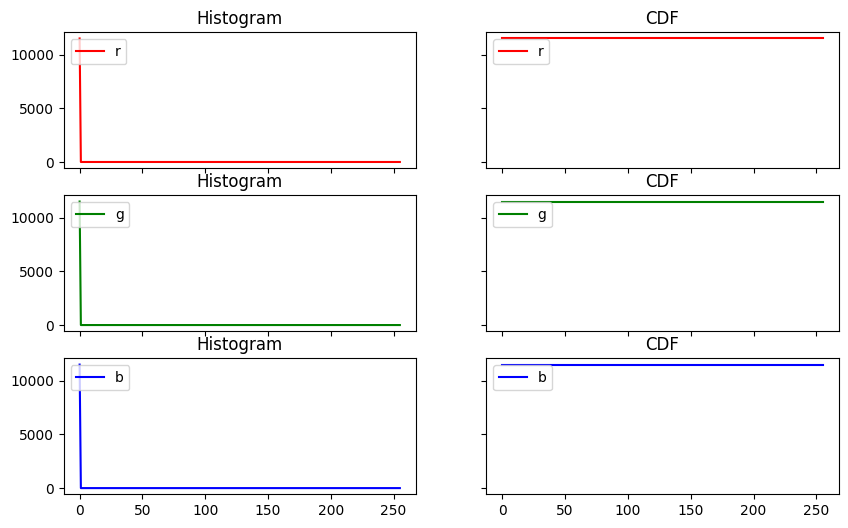

Histogram after equalization of foreground


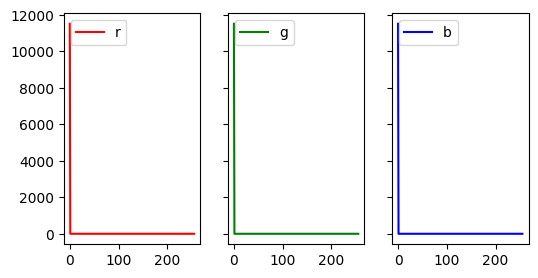

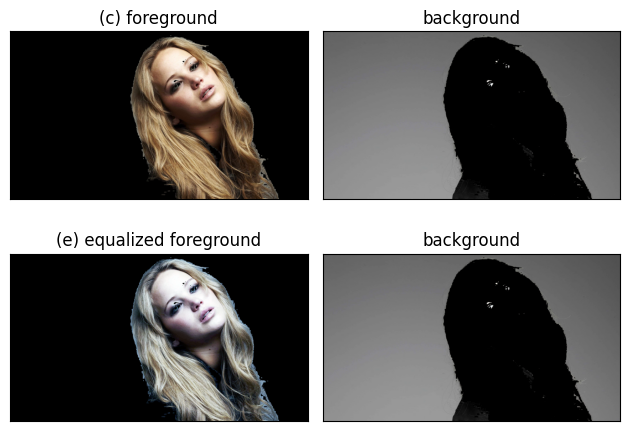

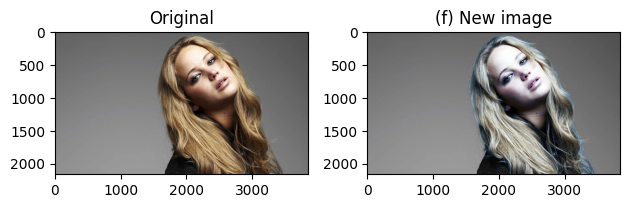

In [141]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig = cv.imread("zooming/jeniffer.jpg",cv.IMREAD_COLOR)
assert img_orig is not None
img_orig1 = cv.cvtColor(img_orig, cv.COLOR_BGR2RGB)
img_orig = cv.cvtColor(img_orig, cv.COLOR_BGR2HSV)
img_H, img_S, img_V = cv.split(img_orig)

#display these planes in grayscale
plt.figure(figsize=(10, 5))
print('(a)')
plt.subplot(1,3,1)
plt.imshow(img_H, cmap='gray')
plt.title('h plane')

plt.subplot(1,3,2)
plt.imshow(img_S, cmap='gray')
plt.title('s plane')

plt.subplot(1,3,3)
plt.imshow(img_V, cmap='gray')
plt.title('v plane')

plt.tight_layout()
plt.show()

# threshold in extract the foreground mask
# (b)
print('(b)')
_, mask = cv.threshold(img_S, 15, 255, cv.THRESH_BINARY)
plt.subplot()
plt.imshow(mask, cmap='gray')
plt.title('Mask')
plt.show()

# (c)
img_foreground = cv.bitwise_and(img_orig1, img_orig1, mask=mask)
#calculating & drawing the histrogram of foreground
print("before equalization(foreground)")
fig, ax = plt.subplots(3,2,figsize=(10,6),sharex='all', sharey='all')
color = ('r', 'g', 'b')
print("(d)")
for index, cl in enumerate(color):
    hist = cv.calcHist(img_foreground,[index],None,[256],[0,256])
    ax[index,0].plot(hist, color=cl)
    #Calculate the cumulative sum (CDF)
    cdf =np.cumsum(hist)
    ax[index,0].set_title("Histogram")
    ax[index,0].legend(cl, loc = 'upper left')
    ax[index,1].plot(cdf, color=cl) 
    #(d)
    ax[index,1].set_title('CDF')
    ax[index,1].legend(cl, loc = 'upper left')
plt.show()

#(e)
r,g,b = cv.split(img_foreground)
r_eq = cv.equalizeHist(r)
g_eq = cv.equalizeHist(g)
b_eq = cv.equalizeHist(b)
img_foreground_eq = cv.merge([r_eq, g_eq, b_eq])

fig, ax = plt.subplots(1,3,figsize=(6,3),sharex='all', sharey='all')
for index, cl in enumerate(color):
    hist = cv.calcHist(img_foreground_eq,[index],None,[256],[0,256])
    ax[index].plot(hist, color=cl)
    ax[index].legend(cl, loc = 'upper left')
print('Histogram after equalization of foreground')
plt.show()

#extracting background
img_background = cv.bitwise_and(img_orig1, img_orig1, mask = cv.bitwise_not(mask))
#adding equalized foreground and background
#(f)
new_img = cv.add(img_background, img_foreground_eq)

fig, ax = plt.subplots(2, 2)
ax[0,0].imshow(img_foreground, cmap='gray')
ax[0,0].set_title('(c) foreground')    
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(img_background, cmap='gray')
ax[0,1].set_title('background')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(img_foreground_eq, cmap='gray',vmin=0, vmax=255)
ax[1,0].set_title('(e) equalized foreground')    
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(img_background, cmap='gray')
ax[1,1].set_title('background')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.tight_layout()

fig1, ax1 = plt.subplots(1,2)
ax1[0].imshow(img_orig1,cmap ='gray',vmin=0, vmax=255)
ax1[0].set_title('Original')
ax1[1].imshow(new_img)
ax1[1].set_title('(f) New image')
plt.tight_layout()
plt.show()


7. Filtering with the Sobel operator can compute the gradient. Consider the image shown in Fig. 7
(a) Using the existing filter2D to Sobel filter the image.
(b) Write your own code to Sobel filter the image.
(c) Using the property
carry out Sobel filtering.


[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]
part(a) :filter_1 time : 0.0 ms
part(b) :filter_2 time : 2.2621564865112305 ms
part(c) :filter_3 time : 1.4434568881988525 ms


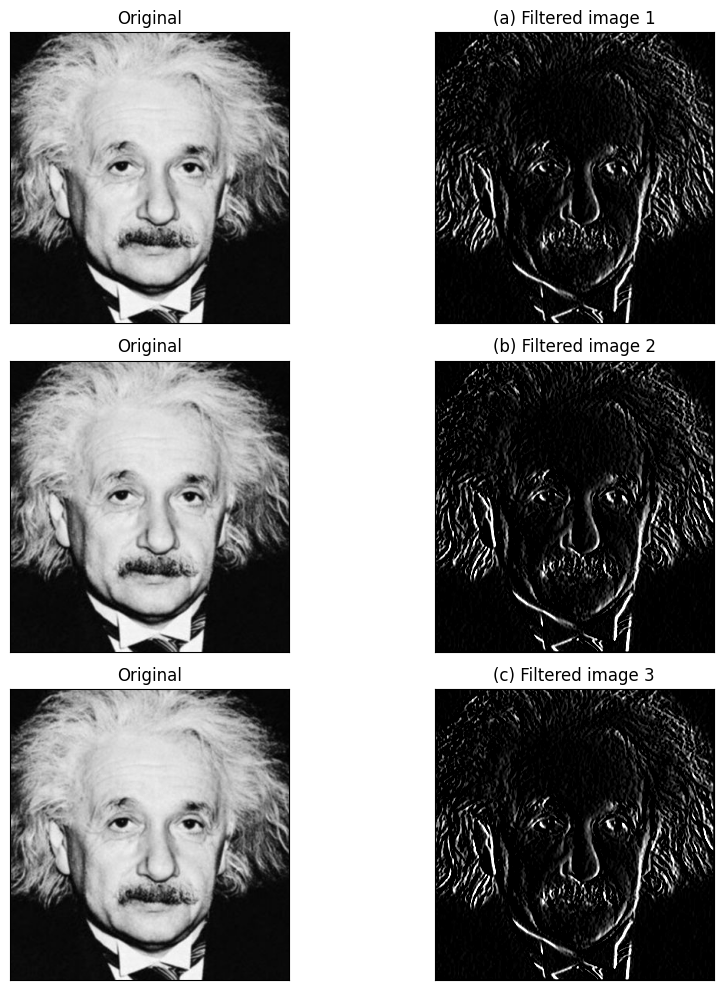

In [63]:
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import time

img_orig = cv.imread(r"zooming\einstein.png",cv.IMREAD_GRAYSCALE)
assert img_orig is not None

#(b)
def filter(img, kernel):
    img_filt = np.zeros((len(img),len(img[0])))

    for j in range(int(len(kernel)/2),len(img)-int(len(kernel)/2)):
        for i in range(int(len(kernel)/2),len(img[0])-int(len(kernel)/2)):
            img_filt[j][i] = 0
            for k1 in range(-int(len(kernel)/2),int(len(kernel)/2)+1):
                for k2 in range(-int(len(kernel[0])/2),int(len(kernel[0])/2)+1):
                    img_filt[j][i] += img[j+k1][i+k2]*kernel[int(len(kernel)/2)+k1][int(len(kernel)/2)+k2]
    return img_filt
#(c)
def filter2(img, vec1, vec2):
    
    img_filt = np.zeros((len(img),len(img[0])))

    for j in range(int(len(vec2)/2),len(img)-int(len(vec2)/2)):
        for i in range(int(len(vec2)/2),len(img[0])-int(len(vec2)/2)):
            temp = np.zeros(len(vec2))
            for k1 in range(-int(len(vec2)/2),int(len(vec2)/2)+1):
                temp[k1+int(len(vec2)/2)] = np.dot(img[j+k1][i-1:i+2],vec2)

            img_filt[j][i] = np.dot(temp,vec1)

            #if(img_filt[j][i] <0):
             #   img_filt[j][i] = 0
            #if(img_filt[j][i] >255):
             #   img_filt[j][i] = 255
    return img_filt

#Colomn and row vectors
vec1 = np.array([1,2,1], dtype = 'float')
vec2 = np.array([1,0,-1], dtype = 'float')

#obtaining kernel from vectors
kernel = np.outer(vec1,vec2)
print(kernel)

#filtering using exsisting filters
start_time = time.time()
#(a)
img_filter1 = cv.filter2D(img_orig, -1, kernel)
end_time = time.time()
print("part(a) :filter_1 time :",end_time - start_time,"ms")

#filtering using function by using kernel
start_time = time.time()
#(b)
img_filter2 = filter(img_orig,kernel)
end_time = time.time()
print("part(b) :filter_2 time :",end_time - start_time,"ms")

#filtering using function by using vectors
start_time = time.time()
img_filter3 = filter2(img_orig, vec1, vec2)
end_time = time.time()
print("part(c) :filter_3 time :",end_time - start_time,"ms")

fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].imshow(img_orig, cmap='gray')
ax[0,0].set_title('Original')
ax[0,0].set_xticks([]),ax[0,0].set_yticks([])

ax[0,1].imshow(img_filter1, cmap='gray',vmin=0,vmax=255)
ax[0,1].set_title('(a) Filtered image 1')
ax[0,1].set_xticks([]),ax[0,1].set_yticks([])

ax[1,0].imshow(img_orig, cmap='gray')
ax[1,0].set_title('Original')
ax[1,0].set_xticks([]),ax[1,0].set_yticks([])

ax[1,1].imshow(img_filter2, cmap='gray',vmin=0,vmax=255)
ax[1,1].set_title('(b) Filtered image 2')
ax[1,1].set_xticks([]),ax[1,1].set_yticks([])

ax[2,0].imshow(img_orig, cmap='gray')
ax[2,0].set_title('Original')
ax[2,0].set_xticks([]),ax[2,0].set_yticks([])

ax[2,1].imshow(img_filter3, cmap='gray',vmin=0,vmax=255)
ax[2,1].set_title('(c) Filtered image 3')
ax[2,1].set_xticks([]),ax[2,1].set_yticks([])

plt.tight_layout()
plt.show()

8. Write a program to zoom images by a given factor s ∈ (0,10]. You must use a function to zoom the image,
which can handle
(a) nearest-neighbor, and
(b) bilinear interpolation.

scale factor: 4


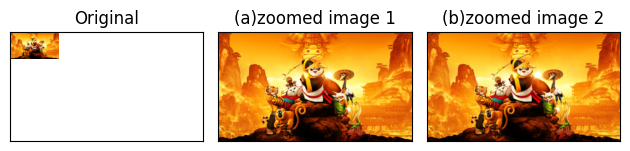

Normalized SSD for zoomed image 1: 34.8459375
Normalized SSD for zoomed image 2: 38.460185667438274


In [117]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#(a)
def nearest_neighbour(img, scale):
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])

    zoomed_img = np.zeros((rows, cols, 3), dtype=np.uint8)
    for i in range(0, rows):
        for j in range(0, cols):
            i2 = round((i+round(scale/2))/scale)-1
            j2 = round((j+round(scale/2))/scale)-1
            zoomed_img[i,j] = img[i2, j2]
    return zoomed_img

#(b)
def bilinear_interpolation(img, scale):
    rows = int(scale*img.shape[0])
    cols = int(scale*img.shape[1])

    zoomed_img = np.zeros((rows, cols, 3), dtype=np.uint8)

    for i in range(0, rows):
        for j in range(0, cols):   
            x = i/(scale)
            y = j/(scale)
            x1, y1 = int(np.floor(x)), int(np.floor(y))
            x2, y2 = int(np.ceil(x)), int(np.ceil(y))
            dx, dy = x - x1, y - y1
            if(x2 >= rows/scale): x2 , dx = 0, 0
            if(y2 >= rows/scale): y2 , dy =0, 0

            interpolated_val = (1-dx)*(1-dy)*img[x1,y1] + dx*(1-dy)*img[x2, y1] + dx*dy*img[x2, y2] + (1-dx)*dy*img[x1, y2]
            zoomed_img[i, j] = interpolated_val.astype(np.uint8)
    
    return zoomed_img

img_org1 = cv.imread(r"zooming\im06small.png",cv.IMREAD_COLOR)
img_org = cv.cvtColor(img_org1, cv.COLOR_RGB2BGR)
scale = 4 #given scale factor

zoomed_img1 = nearest_neighbour(img_org, scale) #(a)
zoomed_img2 = bilinear_interpolation(img_org, scale) #(b)

fig, ax = plt.subplots(1,3, sharex=all, sharey=all)
print("scale factor: "+str(scale))
ax[0].imshow(img_org, cmap='gray')
ax[0].set_title('Original')
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(zoomed_img1 , cmap='gray',vmin=0,vmax=255)
ax[1].set_title('(a)zoomed image 1')
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(zoomed_img2 , cmap='gray',vmin=0,vmax=255)
ax[2].set_title('(b)zoomed image 2')
ax[2].set_xticks([]),ax[2].set_yticks([])

plt.tight_layout()
plt.show()

img_zoom = cv.imread(r"zooming\im06.png",cv.IMREAD_GRAYSCALE)
zoomed_img_1 = cv.cvtColor(zoomed_img1,cv.COLOR_RGB2GRAY)
zoomed_img_2 = cv.cvtColor(zoomed_img2,cv.COLOR_RGB2GRAY)

# Compute the squared difference between the images
squared_diff1 = (img_zoom - zoomed_img_1) ** 2
squared_diff2 = (img_zoom - zoomed_img_2) ** 2

# Calculate the sum of squared differences
ssd1 = np.sum(squared_diff1)
ssd2 = np.sum(squared_diff2)

# Normalize the SSD
normalized_ssd1 = ssd1 / (zoomed_img_1.shape[0] * img_zoom.shape[1])
normalized_ssd2 = ssd2 / (zoomed_img_2.shape[0] * img_zoom.shape[1])

# Display the normalized SSD value
print("Normalized SSD for zoomed image 1:", normalized_ssd1)
print("Normalized SSD for zoomed image 2:", normalized_ssd2)

cv.namedWindow('Image', cv.WINDOW_AUTOSIZE)
cv.imshow('Image',img_org)
cv.waitKey(0)
cv.imshow('Image',zoomed_img1)
cv.waitKey(0)
cv.imshow('Image', zoomed_img2)
cv.waitKey(0)
cv.destroyAllWindows()

9. Fig. 8
shows a flower image with both the foreground and background are in focus. [15]
(a) Use grabCut to segment the image. Show the final segmentation mask, foreground image, and
background image.
(b) Produce an enhanced image with a substantially blurred background. Display the original image
alongside the enhanced image.
(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?


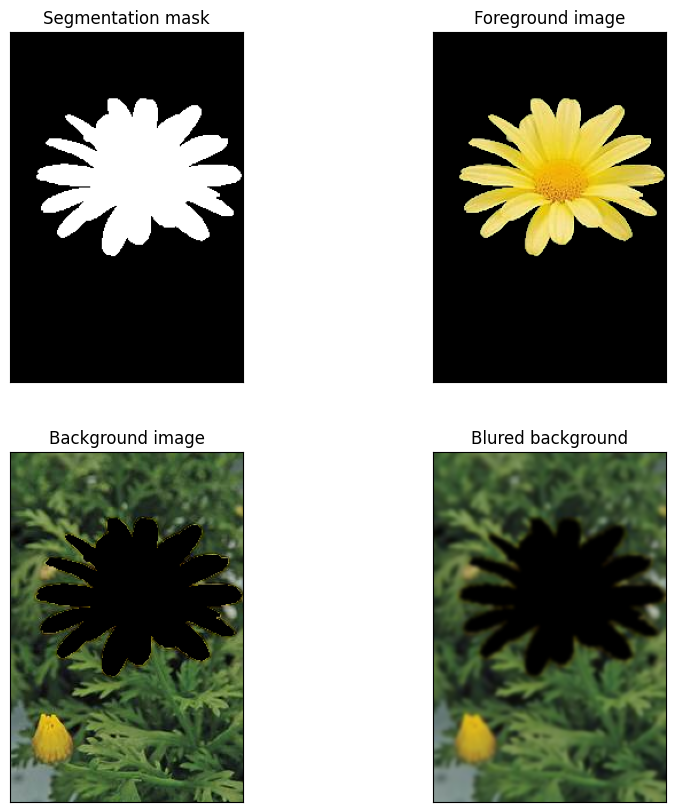

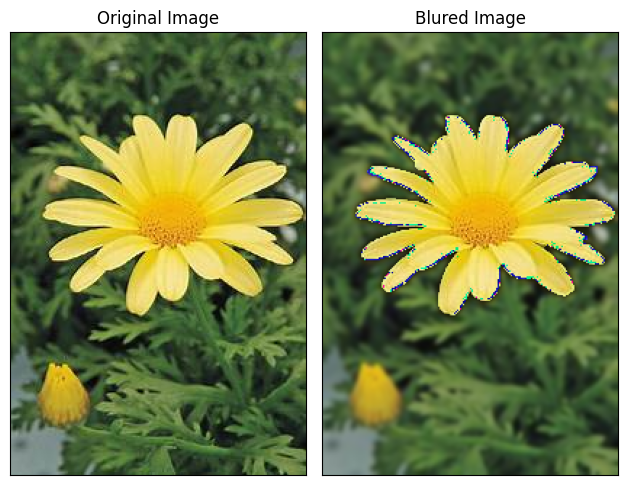

In [121]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img_orig1 = cv.imread(r"zooming\q9.jpg",cv.IMREAD_COLOR)
img_orig = cv.cvtColor(img_orig1, cv.COLOR_BGR2RGB)

mask = np.zeros(img_orig.shape[:2], dtype=np.uint8)

start_x = 15 #19
start_y = 45 #49
w = 200 #159
h = 160 #122
rect = (start_x,start_y, w, h)

bgdModel =None# np.zeros((1, 65), np.float64)
fgdModel = None#np.zeros((1, 65), np.float64)

#(a)
cv.grabCut(img_orig, mask, rect, bgdModel, fgdModel, iterCount=5,mode =cv.GC_INIT_WITH_RECT )

segmented_mask = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')
#binary_mask = np.where(segmented_mask>0, 255, 0).astype(np.uint8)

fgd_img = img_orig*segmented_mask[:, :, np.newaxis]
bgd_img = img_orig - fgd_img #img_orig*(1-segmented_mask[:, :, np.newaxis])

#(b)
blured_bgd_img = cv.GaussianBlur(bgd_img,(0,0), sigmaX = 1.5)

enhanced_img = np.add(fgd_img, blured_bgd_img) 

fig, ax = plt.subplots(2,2, sharex=all, sharey=all, figsize =(10, 10))

ax[0,0].imshow(segmented_mask* 255, cmap='gray',vmin=0,vmax=255)
ax[0,0].set_title("Segmentation mask")
ax[0,0].set_xticks([]),ax[0,0].set_yticks([])

ax[0, 1].imshow(fgd_img , cmap='gray',vmin=1,vmax=255)
ax[0, 1].set_title("Foreground image")
ax[0, 1].set_xticks([]),ax[0, 1].set_yticks([])

ax[1, 0].imshow(bgd_img , cmap='gray',vmin=0,vmax=1)
ax[1, 0].set_title("Background image")
ax[1, 0].set_xticks([]),ax[1, 0].set_yticks([])

ax[1, 1].imshow(blured_bgd_img , cmap='gray',vmin=0,vmax=1)
ax[1, 1].set_title("Blured background")
ax[1, 1].set_xticks([]),ax[1, 1].set_yticks([])

fig1, ax1 = plt.subplots(1,2, sharex=all, sharey=all)
ax1[0].imshow(img_orig, cmap='gray',vmin=0,vmax=255)
ax1[0].set_title('Original Image')
ax1[0].set_xticks([]),ax1[0].set_yticks([])

ax1[1].imshow(enhanced_img , cmap='gray',vmin=0,vmax=1)
ax1[1].set_title("Blured Image")
ax1[1].set_xticks([]),ax1[1].set_yticks([])

plt.tight_layout()
plt.show()

(c) Why is the background just beyond the edge of the flower quite dark in the enhanced image?



The darkening of the background just beyond the edge of the flower in the enhanced image could be due to the combination of the blurred background and the flower's edges. The blurring process results in a gradual transition from the sharp foreground (flower) to the blurred background. This transition zone may appear darker as the pixel values are influenced by both the foreground and background, creating a visual effect that seems darker compared to the in-focus areas